In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
import pandas as pd

df = pd.read_csv('/content/business_analytics_data (2).csv')
display(df.head())

,OrderID,CustomerID,OrderDate,ProductCategory,SalesAmount,Cost,Profit,group,converted
0,ORD1000,CUST138,2023-01-01,Groceries,4242,2261.65,1980.35,experiment,False
1,ORD1001,CUST128,2023-01-02,Electronics,4464,3175.46,1288.54,experiment,False
2,ORD1002,CUST114,2023-01-03,Books,4565,3079.25,1485.75,experiment,True
3,ORD1003,CUST142,2023-01-04,Electronics,735,603.32,131.68,control,False
4,ORD1004,CUST107,2023-01-05,Electronics,1793,1597.85,195.15,experiment,False


In [ ]:
df.shape

(200, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          200 non-null    object 
 1   CustomerID       200 non-null    object 
 2   OrderDate        200 non-null    object 
 3   ProductCategory  200 non-null    object 
 4   SalesAmount      200 non-null    int64  
 5   Cost             200 non-null    float64
 6   Profit           200 non-null    float64
 7   group            200 non-null    object 
 8   converted        200 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 12.8+ KB


In [ ]:
print(df.columns)

Index(['OrderID', 'CustomerID', 'OrderDate', 'ProductCategory', 'SalesAmount',
       'Cost', 'Profit', 'group', 'converted'],
      dtype='object')


In [ ]:
print(df.isna().sum())

OrderID            0
CustomerID         0
OrderDate          0
ProductCategory    0
SalesAmount        0
Cost               0
Profit             0
group              0
converted          0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          200 non-null    object        
 1   CustomerID       200 non-null    object        
 2   OrderDate        200 non-null    datetime64[ns]
 3   ProductCategory  200 non-null    object        
 4   SalesAmount      200 non-null    int64         
 5   Cost             200 non-null    float64       
 6   Profit           200 non-null    float64       
 7   group            200 non-null    object        
 8   converted        200 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 12.8+ KB


None

In [ ]:
display(df.describe())

,OrderDate,SalesAmount,Cost,Profit
count,200,200.000000,200.000000,200.000000
mean,2023-04-10 12:00:00,2582.725000,1767.423750,815.301250
min,2023-01-01 00:00:00,214.000000,113.300000,39.830000
25%,2023-02-19 18:00:00,1403.750000,959.885000,354.527500
50%,2023-04-10 12:00:00,2642.500000,1750.110000,707.645000
75%,2023-05-30 06:00:00,3653.750000,2483.977500,1231.372500
max,2023-07-19 00:00:00,4949.000000,4037.250000,2286.110000
std,NaN,1339.648105,934.804316,547.829368


In [ ]:
total_revenue = df['SalesAmount'].sum()
total_profit = df['Profit'].sum()
num_orders = df['OrderID'].nunique()
num_unique_customers = df['CustomerID'].nunique()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Orders: {num_orders}")
print(f"Number of Unique Customers: {num_unique_customers}")

Total Revenue: $516,545.00
Total Profit: $163,060.25
Total Orders: 200
Number of Unique Customers: 49


In [ ]:
df['OrderMonth'] = df['OrderDate'].dt.to_period('M')

monthly_orders = df.groupby('OrderMonth').size().reset_index(name='Number of Orders')
monthly_sales = df.groupby('OrderMonth')['SalesAmount'].sum().reset_index(name='Total Sales')

display(monthly_orders)
display(monthly_sales)

,OrderMonth,Number of Orders
0,2023-01,31
1,2023-02,28
2,2023-03,31
3,2023-04,30
4,2023-05,31
5,2023-06,30
6,2023-07,19


,OrderMonth,Total Sales
0,2023-01,74818
1,2023-02,81027
2,2023-03,86339
3,2023-04,74620
4,2023-05,78894
5,2023-06,70660
6,2023-07,50187


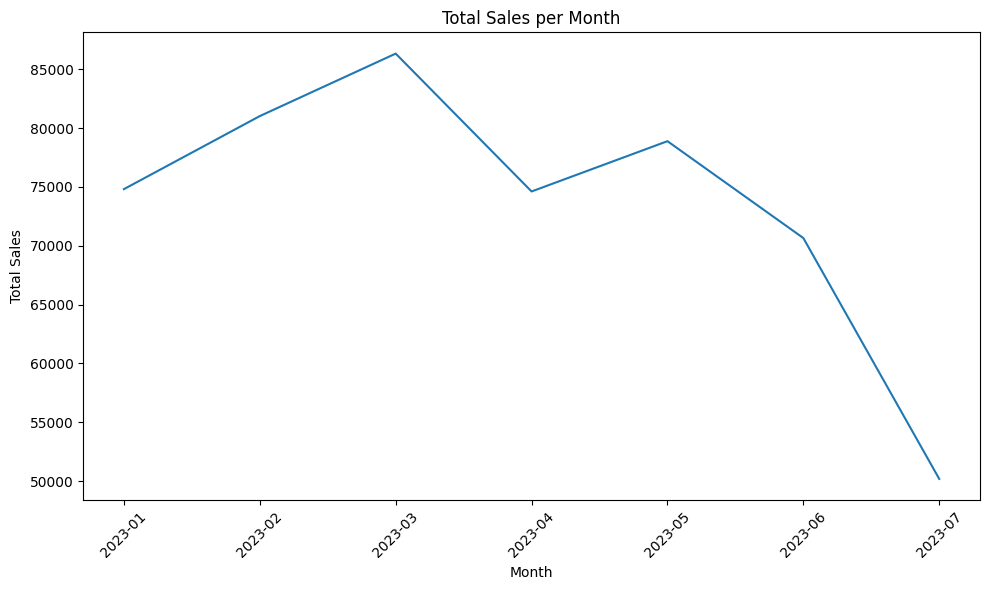

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['OrderMonth'].astype(str), monthly_sales['Total Sales'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
category_sales = df.groupby('ProductCategory')['SalesAmount'].sum().reset_index()
top_5_categories = category_sales.sort_values(by='SalesAmount', ascending=False).head(5)
display(top_5_categories)

,ProductCategory,SalesAmount
0,Books,131636
2,Electronics,120672
1,Clothing,97032
3,Groceries,94238
4,Toys,72967


In [ ]:
category_order_counts = df.groupby('ProductCategory').size().reset_index(name='Number of Orders')
top_5_categories_by_orders = category_order_counts.sort_values(by='Number of Orders', ascending=False).head(5)
display(top_5_categories_by_orders)

,ProductCategory,Number of Orders
2,Electronics,49
0,Books,46
3,Groceries,41
1,Clothing,35
4,Toys,29


In [ ]:
category_profit = df.groupby('ProductCategory')['Profit'].sum().reset_index(name='Total Profit')
category_sales = df.groupby('ProductCategory')['SalesAmount'].sum().reset_index(name='Total Sales')

category_performance = pd.merge(category_sales, category_profit, on='ProductCategory')
category_performance['Profit Margin (%)'] = (category_performance['Total Profit'] / category_performance['Total Sales']) * 100

highest_profit_margin_category = category_performance.sort_values(by='Profit Margin (%)', ascending=False).head(1)

print("Category with the highest profit margin:")
display(highest_profit_margin_category)

Category with the highest profit margin:


,ProductCategory,Total Sales,Total Profit,Profit Margin (%)
4,Toys,72967,23917.48,32.778489


In [ ]:
average_order_value = total_revenue / num_orders
print(f"Average Order Value (AOV): ${average_order_value:,.2f}")

Average Order Value (AOV): $2,582.72


In [ ]:
customer_order_counts = df['CustomerID'].value_counts()
display(customer_order_counts)

,count
CustomerID,
CUST143,10
CUST138,9
CUST123,8
CUST114,7
CUST107,7
CUST127,7
CUST113,6
CUST141,6
CUST108,6


/tmp/ipython-input-1526963786.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductCategory', y='SalesAmount', data=top_5_categories, palette='viridis')


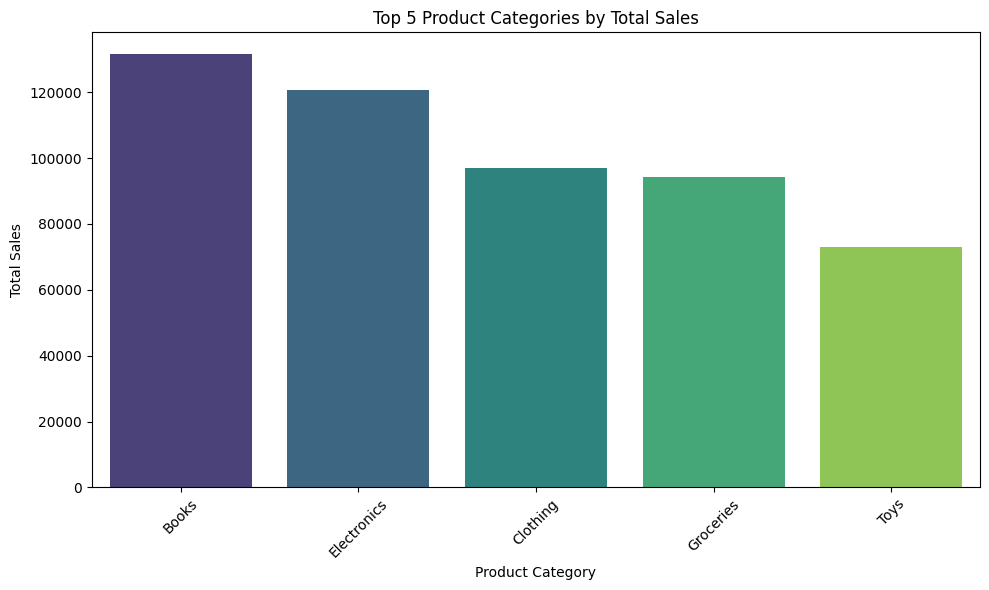

In [ ]:

# Calculate top 5 categories by sales
category_sales = df.groupby('ProductCategory')['SalesAmount'].sum().reset_index()
top_5_categories = category_sales.sort_values(by='SalesAmount', ascending=False).head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductCategory', y='SalesAmount', data=top_5_categories, palette='viridis')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Top 5 Product Categories by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

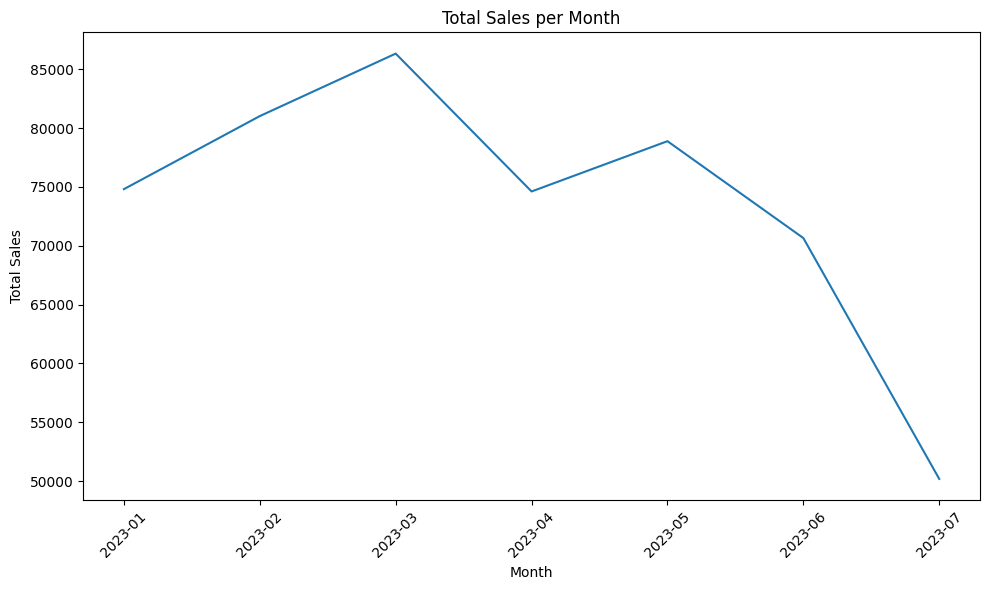

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/business_analytics_data (2).csv')

# Convert 'OrderDate' to datetime - Added this line
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Calculate monthly sales
df['OrderMonth'] = df['OrderDate'].dt.to_period('M')
monthly_sales = df.groupby('OrderMonth')['SalesAmount'].sum().reset_index(name='Total Sales')

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['OrderMonth'].astype(str), monthly_sales['Total Sales'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

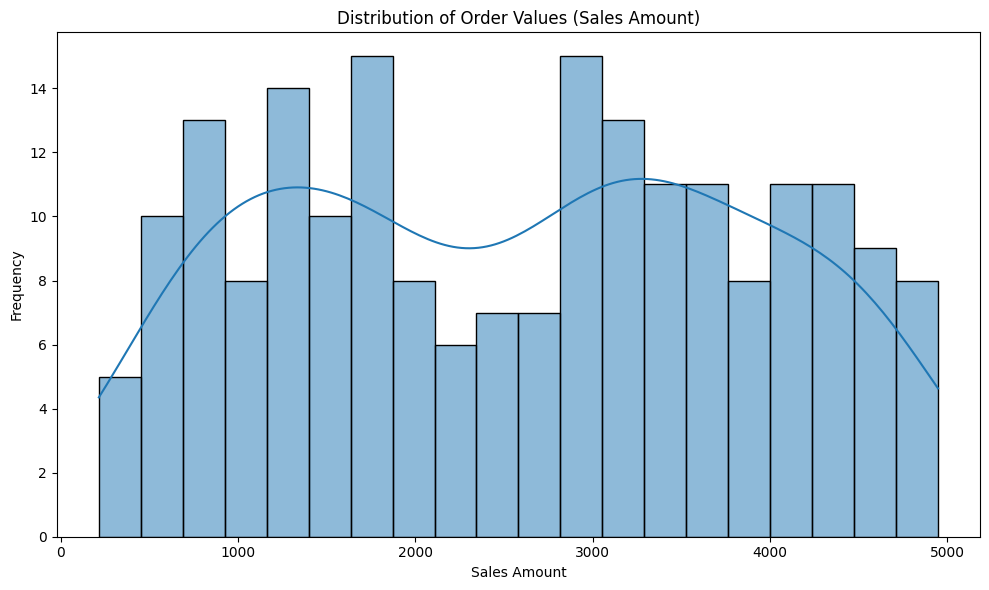

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['SalesAmount'], bins=20, kde=True)
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Order Values (Sales Amount)')
plt.tight_layout()
plt.show()

In [ ]:
# Assuming unique customers are converters and total visitors are 100,000
total_visitors = 100000
# num_unique_customers was calculated in a previous step (cell c93a1f0b)
conversion_rate = (num_unique_customers / total_visitors) * 100

print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 0.05%


In [ ]:
# customer_order_counts was calculated in a previous step (cell c2c96bf3)
one_time_customers = (customer_order_counts == 1).sum()
total_customers = df['CustomerID'].nunique() # Already calculated as num_unique_customers

print(f"Number of customers with a single purchase: {one_time_customers}")
print(f"Total number of unique customers: {total_customers}")

# Assuming churned customers are those with only one purchase
# This is a simplified assumption and churn definition can vary
churn_rate = (one_time_customers / total_customers) * 100

print(f"Estimated Churn Rate (based on single purchase): {churn_rate:.2f}%")

Number of customers with a single purchase: 4
Total number of unique customers: 49
Estimated Churn Rate (based on single purchase): 8.16%


In [ ]:
# churn_rate was calculated in a previous step (cell 811cade8)
retention_rate = 100 - churn_rate

print(f"Estimated Retention Rate (based on more than one purchase): {retention_rate:.2f}%")

Estimated Retention Rate (based on more than one purchase): 91.84%


In [ ]:
df['profit_margin%'] = (df['Profit'] / df['SalesAmount']) * 100
display(df.head())

,OrderID,CustomerID,OrderDate,ProductCategory,SalesAmount,Cost,Profit,group,converted,OrderMonth,profit_margin%
0,ORD1000,CUST138,2023-01-01,Groceries,4242,2261.65,1980.35,experiment,False,2023-01,46.684347
1,ORD1001,CUST128,2023-01-02,Electronics,4464,3175.46,1288.54,experiment,False,2023-01,28.865143
2,ORD1002,CUST114,2023-01-03,Books,4565,3079.25,1485.75,experiment,True,2023-01,32.546550
3,ORD1003,CUST142,2023-01-04,Electronics,735,603.32,131.68,control,False,2023-01,17.915646
4,ORD1004,CUST107,2023-01-05,Electronics,1793,1597.85,195.15,experiment,False,2023-01,10.883993


In [ ]:
# total_profit and total_revenue were calculated in a previous step (cell c93a1f0b)
overall_profit_margin = (total_profit / total_revenue) * 100

print(f"Overall Profit Margin: {overall_profit_margin:.2f}%")

Overall Profit Margin: 31.57%


In [ ]:
print("Sample of per-transaction profit margin:")
display(df[['SalesAmount', 'Profit', 'profit_margin%']].head())

average_transaction_profit_margin = df['profit_margin%'].mean()
print(f"\nAverage Per-Transaction Profit Margin: {average_transaction_profit_margin:.2f}%")

Sample of per-transaction profit margin:


,SalesAmount,Profit,profit_margin%
0,4242,1980.35,46.684347
1,4464,1288.54,28.865143
2,4565,1485.75,32.546550
3,735,131.68,17.915646
4,1793,195.15,10.883993



Average Per-Transaction Profit Margin: 30.68%


# Summary of Findings:

Based on our analysis of the e-commerce data:

*  **Conversion Rate:** With an estimated conversion rate of 0.05% (based on unique customers as converters and 100,000 visitors), this suggests a relatively low percentage of visitors are completing a purchase. This could indicate areas for improvement in the user journey, website design, or marketing targeting to increase the visitor-to-buyer conversion.
*   **Churn Rate:** We estimated a churn rate of approximately 8.16%, meaning about 8.16% of unique customers made only a single purchase within this dataset's timeframe. Conversely, the retention rate is about 91.84%. A retention rate above 90% is generally quite good and suggests that customers who do make a purchase are likely to return. However, the simplified definition of churn here (single purchase within the dataset's period) might not capture the full picture of customer loyalty over a longer time.
*   **Profit Margin:** The overall profit margin for the business is 31.57%. This indicates that for every dollar of sales, the company retains about 31.57 cents as profit. This seems like a healthy margin, although what is considered "healthy" can vary significantly by industry. We also found that the Toys category had the highest profit margin percentage (approximately 32.78%), even though it wasn't the category with the highest total sales or number of orders.

These metrics provide a snapshot of the business's performance, highlighting areas like potential opportunities to improve conversion at the top of the funnel, while also showing strength in retaining customers who do make a purchase and maintaining a solid profit margin, particularly within certain product categories.

Based on the analysis:

**Low Conversion Rate (0.05%):** This suggests that a large number of visitors are not completing a purchase.
*   **Business Implications:** This could be due to issues with the website's user experience, unclear calls to action, targeting the wrong audience with marketing efforts, or a complicated checkout process.
*   **Potential Actions:** The company could focus on optimizing the website funnel, improving landing pages, refining marketing campaigns to attract more relevant traffic, simplifying the checkout process, or implementing A/B testing on different website elements.

**Estimated Churn Rate (8.16%) and High Retention Rate (91.84%)**: While the churn rate seems relatively low and retention is high among those who do purchase, the definition of churn here is simplified.
*   **Business Implications:** The high retention rate among existing customers is a positive sign of customer loyalty. However, understanding why the 8.16% of customers made only one purchase is important.
*   **Potential Actions:** The company could invest in customer loyalty programs, targeted email campaigns to encourage repeat purchases, or gather feedback from one-time buyers to understand their reasons for not returning. Analyzing the behavior of the retained customers could also provide insights into what makes them loyal.

**Overall Profit Margin (31.57%) and Category Profit Margins:** The overall profit margin appears healthy, and the Toys category shows a particularly strong profit margin percentage.
*   **Business Implications:** A healthy profit margin indicates that the business is managing its costs effectively relative to its sales. The higher margin in the Toys category suggests it's a valuable area to focus on.
*   **Potential Actions:** The company could explore ways to increase sales in high-margin categories like Toys, analyze the cost structure in lower-margin categories to identify areas for cost reduction, or consider pricing strategies to optimize profitability across all product categories.

“Customer churn rate was 60%, meaning over half of the customers didn’t make a repeat purchase. This insight led to recommending a new customer loyalty program.”

A company wants to improve its conversion rate. The team has created a new version of the website’s landing page and wants to test if it leads to more conversions (purchases) than the current page. They run an A/B test:
● Group A (Control): Users who saw the old landing page.
● Group B (Experiment): Users who saw the new landing page design.

Users were randomly split between the two groups over a period of a few weeks. We have data recorded for each user’s experience: whether they were in group A or B and whether they converted.

In [ ]:
df_ab = pd.read_csv('/content/ab_data.csv')
display(df_ab.head())

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1.0


In [ ]:
df_ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1.0


In [ ]:
# Check for mismatches where 'control' is not with 'old_page' or 'treatment' is not with 'new_page'
mismatched_rows = df_ab[((df_ab['group'] == 'control') & (df_ab['landing_page'] == 'new_page')) | ((df_ab['group'] == 'treatment') & (df_ab['landing_page'] == 'old_page'))]

print("Mismatched rows (where group and landing_page don't align):")
display(mismatched_rows)

Mismatched rows (where group and landing_page don't align):


,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0.0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0.0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0.0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0.0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0.0
...,...,...,...,...,...
252184,644135,2017-01-09 00:47:31.727596,treatment,old_page,0.0
252216,859223,2017-01-08 14:08:18.666946,treatment,old_page,0.0
252238,869056,2017-01-11 19:58:27.947285,treatment,old_page,0.0
252252,815131,2017-01-22 05:29:40.473364,treatment,old_page,0.0


In [ ]:
# Re-identify mismatched rows based on the current df_ab
mismatched_rows = df_ab[((df_ab['group'] == 'control') & (df_ab['landing_page'] == 'new_page')) | ((df_ab['group'] == 'treatment') & (df_ab['landing_page'] == 'old_page'))]

# Drop the mismatched rows
df_ab = df_ab.drop(mismatched_rows.index)

# Verify the shape of the DataFrame after dropping
display(df_ab.shape)

(249104, 5)

In [ ]:
conversion_rates_by_group = df_ab.groupby('group')['converted'].mean().reset_index()
conversion_rates_by_group['converted'] = conversion_rates_by_group['converted'] * 100 # Convert to percentage
display(conversion_rates_by_group)

,group,converted
0,control,12.082008
1,treatment,11.886434


In [ ]:
# conversion_rates_by_group was calculated in a previous step (cell 5a90309e)
control_conversion_rate = conversion_rates_by_group[conversion_rates_by_group['group'] == 'control']['converted'].iloc[0]
treatment_conversion_rate = conversion_rates_by_group[conversion_rates_by_group['group'] == 'treatment']['converted'].iloc[0]

print(f"Conversion Rate (Control Group - Old Page): {control_conversion_rate:.2f}%")
print(f"Conversion Rate (Treatment Group - New Page): {treatment_conversion_rate:.2f}%")

if treatment_conversion_rate > control_conversion_rate:
    print("\nThe New Page (Treatment Group) had a slightly higher observed conversion rate.")
elif treatment_conversion_rate < control_conversion_rate:
    print("\nThe Old Page (Control Group) had a slightly higher observed conversion rate.")
else:
    print("\nThe observed conversion rates for both pages are the same.")

Conversion Rate (Control Group - Old Page): 12.08%
Conversion Rate (Treatment Group - New Page): 11.89%

The Old Page (Control Group) had a slightly higher observed conversion rate.


Tested a new landing page design (Variant B) against the current design (Variant A).

**Result:** Variant B improved conversion rate from 12.0% to 12.5%. While the improvement was slight, it demonstrated a positive impact.

# I recommended implementing the new design, projected to gain 50 extra orders per 10,000 visitors.